In [83]:
import pandas as pd
import sklearn
import matplotlib.pyplot as mp
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

#from google.colab import files
#uploaded = files.upload()

In [84]:
nike_sales = pd.read_csv('nike_shoes_sales.csv')
nike_sales.columns = ['product_name','product_id','listing_price','sales_price','discount','brand','description','rating','reviews','images']
nike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   643 non-null    object 
 1   product_id     643 non-null    object 
 2   listing_price  643 non-null    int64  
 3   sales_price    643 non-null    int64  
 4   discount       643 non-null    int64  
 5   brand          643 non-null    object 
 6   description    640 non-null    object 
 7   rating         643 non-null    float64
 8   reviews        643 non-null    int64  
 9   images         572 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 50.4+ KB


In [85]:
nike_sales.describe()

,listing_price,sales_price,discount,rating,reviews
count,643.000000,643.000000,643.0,643.000000,643.000000
mean,3875.762053,10213.676516,0.0,2.734837,7.181960
std,5889.947172,4513.289512,0.0,2.137756,15.968315
min,0.000000,1595.000000,0.0,0.000000,0.000000
25%,0.000000,6995.000000,0.0,0.000000,0.000000
50%,0.000000,9597.000000,0.0,3.800000,1.000000
75%,8495.000000,12797.000000,0.0,4.600000,6.000000
max,19995.000000,36500.000000,0.0,5.000000,223.000000


In [86]:
nike_sales.head()

,product_name,product_id,listing_price,sales_price,discount,brand,description,rating,reviews,images
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."


In [87]:
nike_sales['brand'].unique()

array(['Nike'], dtype=object)

## To verify if there are any duplicate values

In [88]:
# By the product_id column only
len(nike_sales) - len(nike_sales.drop_duplicates(subset="product_id"))

89

In [89]:
#Now using 4 columns
df_duplicates = nike_sales[nike_sales[['product_id','sales_price','rating','reviews']].duplicated() == True]
df_duplicates

,product_name,product_id,listing_price,sales_price,discount,brand,description,rating,reviews,images
167,Nike Metcon 5 AMP,CD3395-006,0,11995,0,Nike,The Nike Metcon 5 AMP arms you with stability ...,5.0,2,"[""https://static.nike.com/a/images/t_PDP_1728_..."
236,Nike Mercurial Vapor 13 Club Neymar Jr. TF,AT8000-104,0,5495,0,Nike,The Nike Mercurial Vapor 13 Club Neymar Jr. TF...,0.0,0,NaN
237,Nike Mercurial Vapor 13 Elite Neymar Jr. FG,AT7898-104,0,22995,0,Nike,"Building on the 360 innovation of the 12, the ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
238,Nike Mercurial Vapor 13 Academy Neymar Jr. TF,AT7995-104,0,7995,0,Nike,The soft upper of the Nike Mercurial Vapor 13 ...,0.0,0,NaN
239,Nike Mercurial Vapor 13 Academy Neymar Jr. MG,AT7960-104,0,7995,0,Nike,The Nike Mercurial Vapor 13 Academy Neymar Jr....,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
...,...,...,...,...,...,...,...,...,...,...
633,Nike ZoomX Vaporfly NEXT%,AO4568-600,0,19995,0,Nike,The Nike ZoomX Vaporfly NEXT% clears your path...,4.7,45,"[""https://static.nike.com/a/images/t_PDP_1728_..."
634,Nike Mercurial Vapor 13 Academy IC,AT7993-414,7495,5247,0,Nike,The soft upper of the Nike Mercurial Vapor 13 ...,0.0,0,NaN
636,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,"In spiritual circles, the colour purple repres...",4.4,10,"[""https://static.nike.com/a/images/t_PDP_1728_..."
639,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,NaN


##*Created a new DataFrame to use the columns product_id, sales_price, rating and review, by also filtering the 0 values on these last two columns*

In [90]:
nike_sales_df2 = nike_sales.loc[(nike_sales['rating']>0) & (nike_sales['reviews']>=20),['product_id','sales_price','rating','reviews']].drop_duplicates(keep=False, inplace=False)
#Modified the sales_price value by moving the decimal point 
nike_sales_df2.loc[:, 'sales_price'] = nike_sales_df2['sales_price']/10
nike_sales_df2.sort_values(by=['reviews'],ascending=False)

,product_id,sales_price,rating,reviews
125,310805-137,1599.5,4.7,223
180,880848-005,1449.5,4.3,105
186,415445-102,529.5,4.1,94
109,AH8050-100,1399.5,3.8,81
267,315122-001,729.5,4.5,78
332,BQ8928-011,1039.7,4.1,72
317,849559-004,1599.5,2.9,71
155,CD4371-001,1399.5,4.6,68
11,315115-112,749.5,4.5,67
25,AQ2730-009,1499.5,4.0,65


In [91]:
nike_sales_df2.describe()

,sales_price,rating,reviews
count,51.000000,51.000000,51.000000
mean,1049.966667,4.074510,45.784314
std,394.744618,0.459061,33.143514
min,249.500000,2.600000,20.000000
25%,724.600000,3.850000,25.000000
50%,999.500000,4.200000,33.000000
75%,1399.500000,4.400000,61.500000
max,1699.500000,4.800000,223.000000


<Axes: >

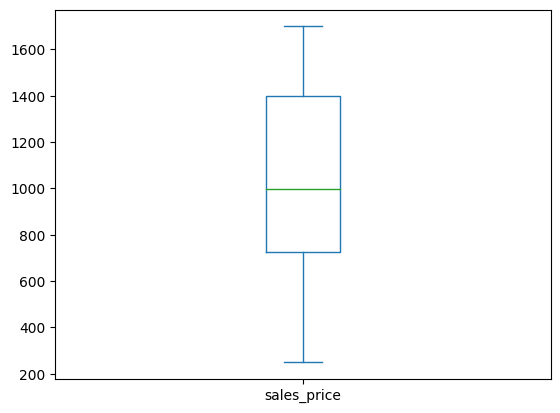

In [92]:
nike_sales_df2['sales_price'].plot(kind='box')

<Axes: >

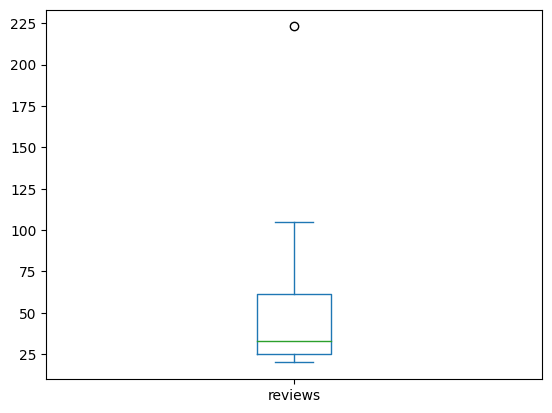

In [93]:
nike_sales_df2['reviews'].plot(kind='box')

<Axes: >

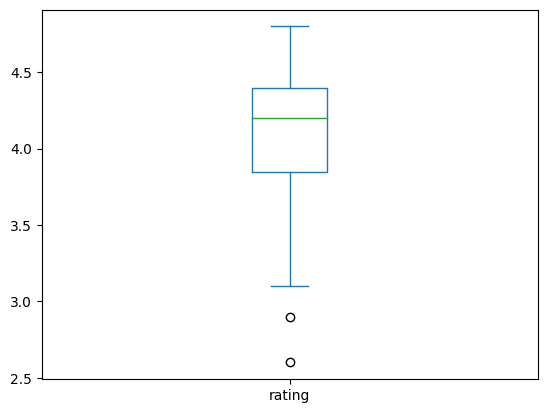

In [94]:
nike_sales_df2['rating'].plot(kind='box')

<Axes: xlabel='rating', ylabel='reviews'>

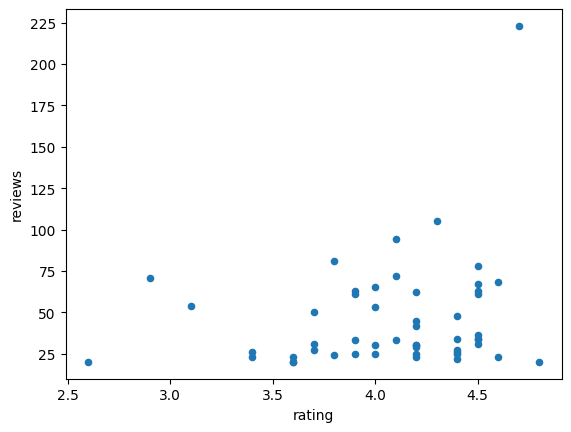

In [95]:
nike_sales_df2.plot("rating","reviews",kind='scatter')

<Axes: xlabel='reviews', ylabel='sales_price'>

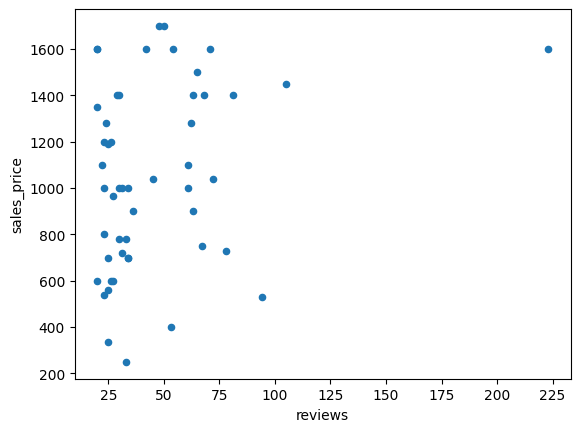

In [96]:
nike_sales_df2.plot("reviews","sales_price",kind='scatter')

<Axes: xlabel='product_id', ylabel='sales_price'>

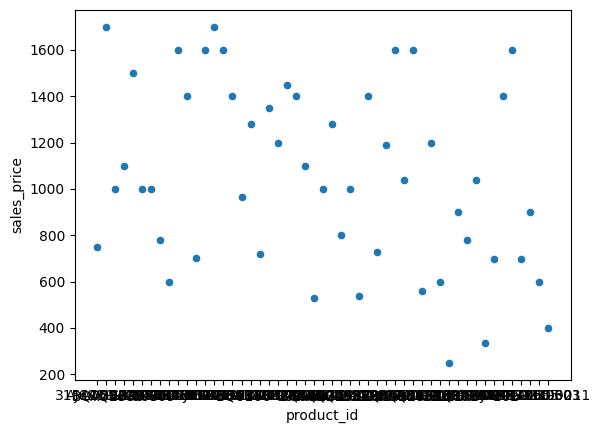

In [97]:
nike_sales_df2.plot("product_id","sales_price",kind='scatter')

<Axes: xlabel='rating', ylabel='sales_price'>

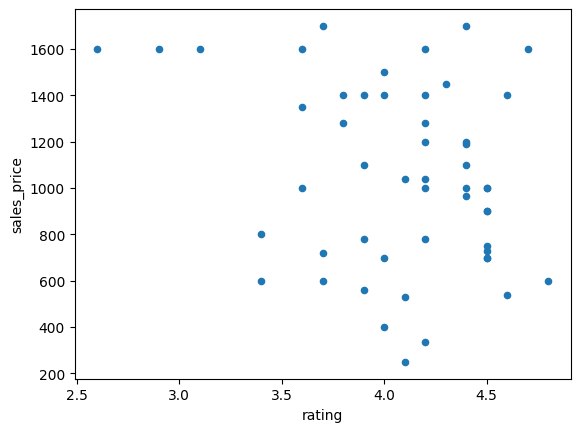

In [98]:
nike_sales_df2.plot("rating","sales_price",kind='scatter')

nike_sales.plot("sales_price","reviews",'scatter')

In [99]:
X = nike_sales_df2[['reviews']]
y = nike_sales_df2[['sales_price']]

LinReg = LinearRegression()
LinReg.fit(X,y)
print(LinReg.intercept_, LinReg.coef_)

[896.74323594] [[3.34663596]]


In [100]:
print(LinReg.score(X,y))

0.07895536184248864


## Looking for a correlation between listing_prices and sales_price

<Axes: >

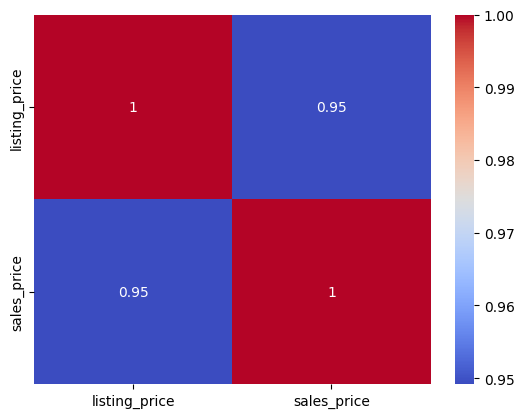

In [101]:
Corr_nike_Sales = nike_sales.select_dtypes(include=['int64','float64']).loc[nike_sales['listing_price']>0,['listing_price','sales_price']]
matrix = Corr_nike_Sales.corr()
sb.heatmap(matrix, annot= True, cmap ='coolwarm')

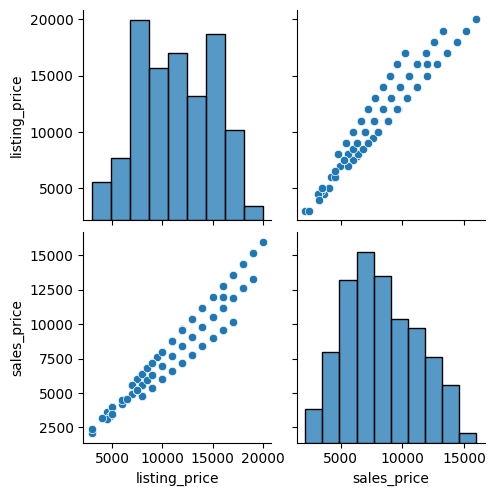

In [102]:
sb.pairplot(Corr_nike_Sales)

In [103]:
X = Corr_nike_Sales[['sales_price']]
y = Corr_nike_Sales[['listing_price']]

LinReg = LinearRegression()
LinReg.fit(X,y)
print(LinReg.score(X,y))

0.900907100900749


In [104]:
import numpy as np

#Extracted only the values of the sales_price column that go along listing_prices with value of 0.
sales_price = np.array(nike_sales.loc[nike_sales['listing_price']==0,['sales_price']]).reshape((-1, 1))

In [107]:
#Ran a prediction of the listing price values according to the linear regression model created. 
listing_price_predicted = LinReg.predict(sales_price)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [108]:
#Inserted the predicted listing price values on a new data frame to match it with its product_id and sales_price. 
predicted_lp_df = nike_sales.loc[nike_sales['listing_price']==0,['product_id','listing_price','sales_price']]
predicted_lp_df['listing_price'] = listing_price_predicted
predicted_lp_df

,product_id,listing_price,sales_price
0,CJ1646-600,10560.134965,7495
1,CT4328-101,10560.134965,7495
2,CI3482-200,13670.568215,9995
3,CD0479-200,13670.568215,9995
4,CZ6156-101,13670.568215,9995
...,...,...,...
632,CD2722-001,21135.608015,15995
633,AO4568-600,26112.301216,19995
635,AT6100-606,9315.961665,6495
637,CT9155-063,18647.261415,13995


## De aquí hacia abajo, estamos probando algunas otras cosas categorizar los datos.

In [ ]:
nike_sales_cat = nike_sales
nike_sales_cat.drop(["listing_price","discount","brand","images"],axis=1,inplace=True)
nike_sales_cat.loc[(nike_sales['rating'] >= 3.5)].sort_values(by=['reviews'],ascending=False)

In [ ]:
words = {'Air', 'Jordan', 'Force','Zoom','Max'}
nike_sales_cat["matches"] = nike_sales_cat["product_name"].str.split().apply(set(words).intersection)
nike_sales_df3 = nike_sales.loc[(nike_sales['rating'] >= 3.5)].sort_values(by=['reviews'],ascending=False)
nike_sales_df3.rename(columns = {'matches':'category'}, inplace = True)
nike_sales_df3

In [ ]:
print (len(nike_sales_df3[nike_sales_df3['category'] == '{}']))
#count = nike_sales_df3['category'].apply(lambda x: x == {}).sum()
#print(count)